In [0]:
#https://tensorflow.blog/2018/02/18/mlpclassifier%EC%9D%98-%EB%8B%A4%EC%A4%91-%EB%A0%88%EC%9D%B4%EB%B8%94-%EB%B6%84%EB%A5%98/
#https://github.com/rickiepark/introduction_to_ml_with_python/blob/master/MLP_Multilabel.ipynb

In [0]:
!git clone https://github.com/rickiepark/introduction_to_ml_with_python

Cloning into 'introduction_to_ml_with_python'...
remote: Enumerating objects: 21, done.
remote: Counting objects: 100% (21/21), done.
remote: Compressing objects: 100% (20/20), done.
remote: Total 951 (delta 2), reused 6 (delta 1), pack-reused 930
Receiving objects: 100% (951/951), 499.89 MiB | 31.51 MiB/s, done.
Resolving deltas: 100% (507/507), done.


In [0]:
ls -alrt

total 18012
drwxr-xr-x 1 root root     4096 Mar  3 01:09  ../
-rw-r--r-- 1 root root       51 Mar  3 01:09  .gitignore
-rw-r--r-- 1 root root       47 Mar  3 01:09  .env
-rw-r--r-- 1 root root   240940 Mar  3 01:09  01-introduction.ipynb
-rw-r--r-- 1 root root  1649945 Mar  3 01:09  02-supervised-learning.ipynb
-rw-r--r-- 1 root root   312221 Mar  3 01:09  02.3.7-Bagging-ExtraTrees-Adaboost.ipynb
-rw-r--r-- 1 root root 11515195 Mar  3 01:09  03-unsupervised-learning.ipynb
-rw-r--r-- 1 root root    92695 Mar  3 01:09  03.3.3-QuantileTransformer-PowerTransformer.ipynb
-rw-r--r-- 1 root root  1227241 Mar  3 01:09  04-representing-data-feature-engineering.ipynb
-rw-r--r-- 1 root root  1177457 Mar  3 01:09  05-model-evaluation-and-improvement.ipynb
-rw-r--r-- 1 root root    24646 Mar  3 01:09  05.1.4-RepeatedKFold.ipynb
-rw-r--r-- 1 root root    11883 Mar  3 01:09  07-konlpy.ipynb
-rw-r--r-- 1 root root   167688 Mar  3 01:09  06-algorithm-chains-and-pipelines.ipynb
-rw-r--r-- 1 root root   

In [0]:
cd introduction_to_ml_with_python

/content/introduction_to_ml_with_python


In [0]:
%load_ext watermark
%watermark -v -p sklearn,numpy,scipy,matplotlib

ModuleNotFoundError: ignored

In [0]:
from preamble import *

In [0]:
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier

X, y = make_moons(n_samples=100, noise=0.25, random_state=3)

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)
y_train.shape, y_train

((75,),
 array([1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1,
        0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1,
        0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0,
        0, 0, 0, 1, 0, 0, 1, 0, 0]))

In [0]:
Y_train = np.zeros((y_train.shape[0], 2))
for index, x in np.ndenumerate(y_train):
    Y_train[index, x] = 1

Y_test = np.zeros((y_test.shape[0], 2))
for index, x in np.ndenumerate(y_test):
    Y_test[index, x] = 1

Y_train[:10], Y_test[:10]

(array([[0., 1.],
        [0., 1.],
        [1., 0.],
        [0., 1.],
        [0., 1.],
        [1., 0.],
        [0., 1.],
        [1., 0.],
        [1., 0.],
        [0., 1.]]), array([[0., 1.],
        [0., 1.],
        [0., 1.],
        [1., 0.],
        [0., 1.],
        [0., 1.],
        [1., 0.],
        [0., 1.],
        [0., 1.],
        [0., 1.]]))

findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 53945 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 53945 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/_backend_pdf_ps.py:62: RuntimeWarning: Glyph 53945 missing from current font.
  font.set_text(s, 0.0, flags=ft2font.LOAD_NO_HINTING)
/usr/local/lib/python3.6/dist-packages/matplo

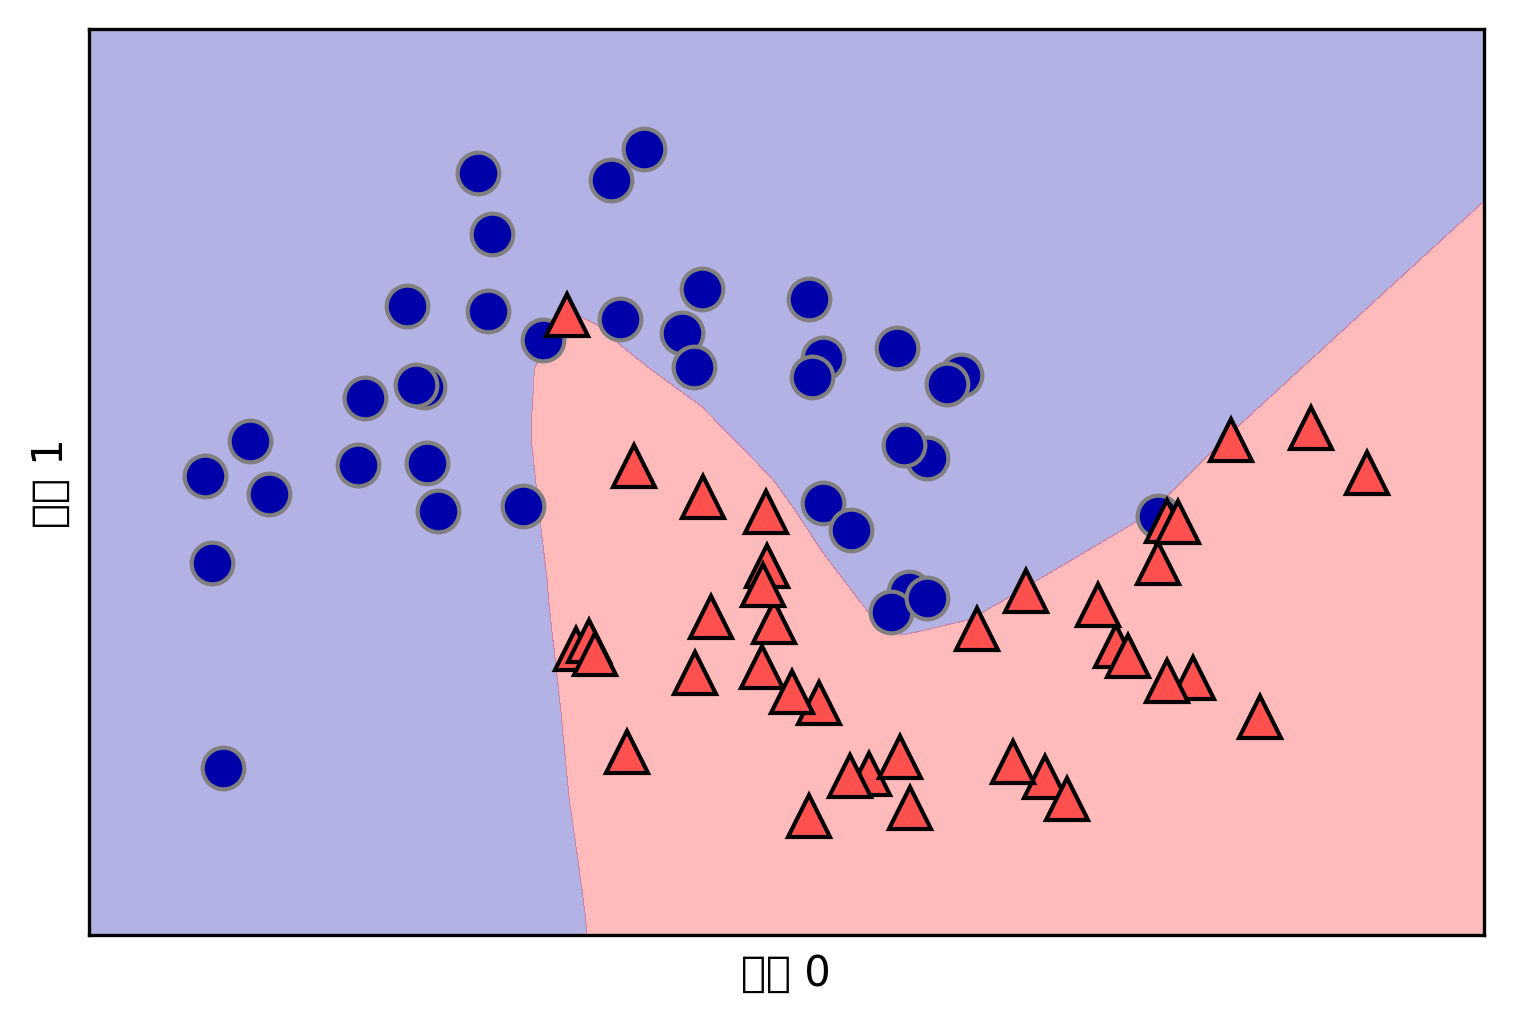

In [0]:
mlp_multi = MLPClassifier(solver='lbfgs', random_state=0).fit(X_train, Y_train)
mglearn.plots.plot_2d_separator(mlp_multi, X_train, fill=True, alpha=.3)

mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("특성 0")
plt.ylabel("특성 1")
plt.show()

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 53945 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 53945 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/_backend_pdf_ps.py:62: RuntimeWarning: Glyph 53945 missing from current font.
  font.set_text(s, 0.0, flags=ft2font.LOAD_NO_HINTING)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/_backend_pdf_ps.py:62: RuntimeWarning: Glyph 49457 missing from curre

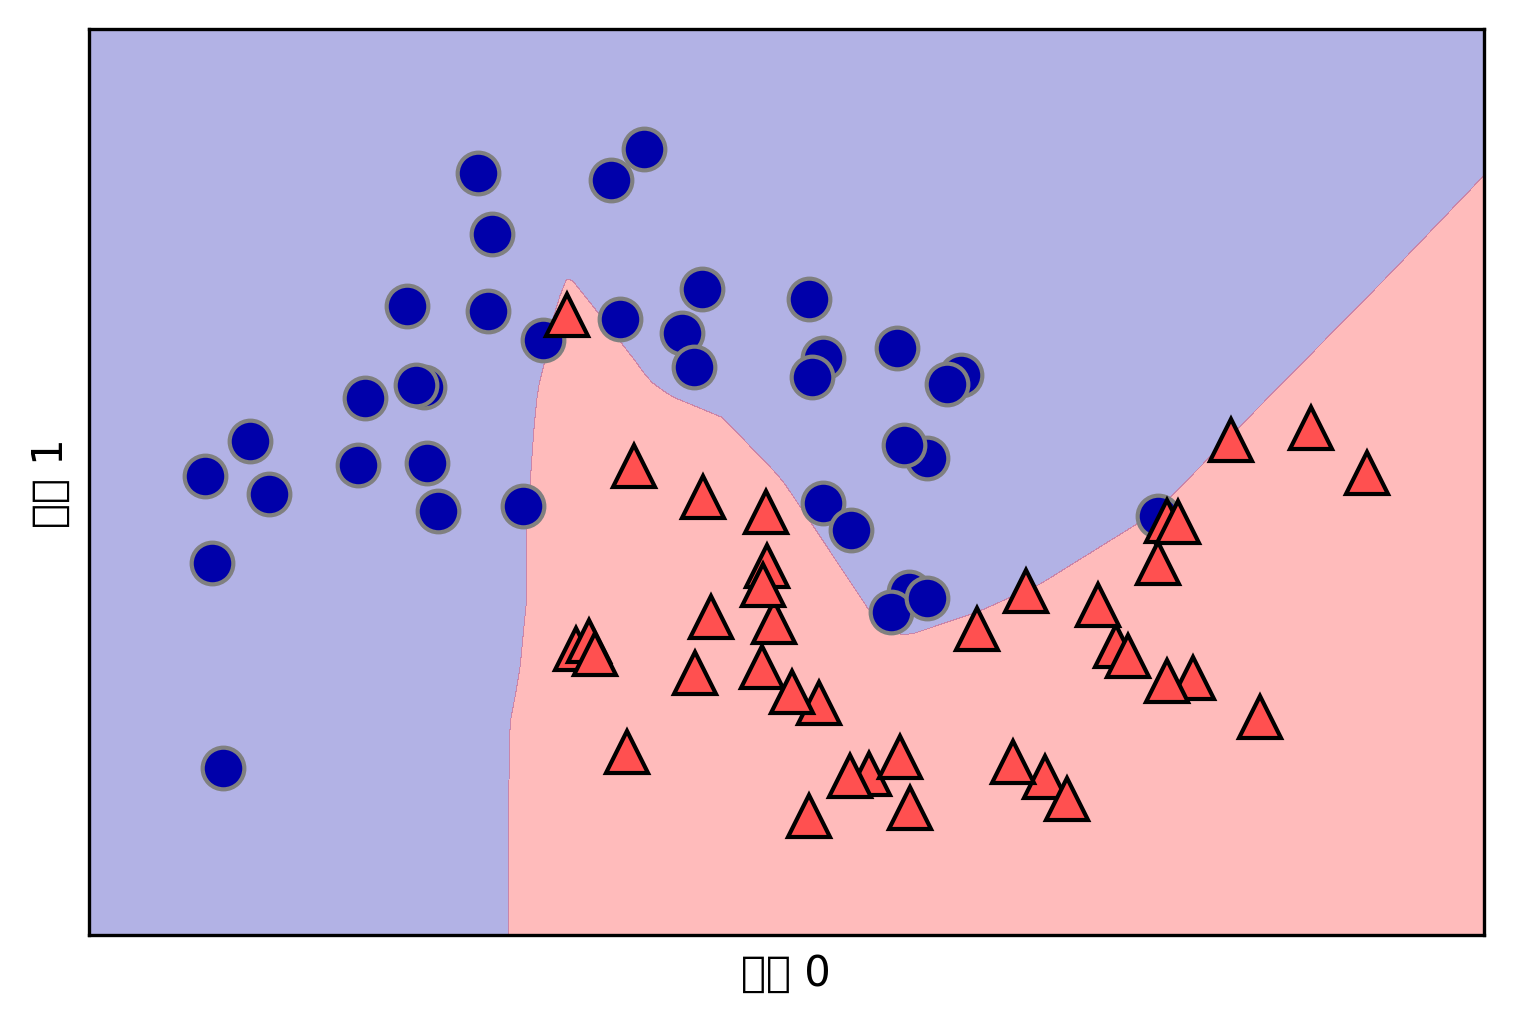

In [0]:
mlp = MLPClassifier(solver='lbfgs', random_state=0).fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)

mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("특성 0")
plt.ylabel("특성 1")
plt.show()

In [0]:
mlp_multi.score(X_test, Y_test), mlp.score(X_test, y_test)

(0.88, 0.88)

In [0]:
from sklearn.datasets import fetch_openml
yeast = fetch_openml('yeast', version=4)

In [0]:
X = yeast['data']
Y = yeast['target']
Y = Y == 'TRUE'
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
X.shape, Y_train[:10]

((2417, 103),
 array([[False,  True,  True,  True, False, False, False, False, False,
          True,  True,  True,  True, False],
        [ True,  True, False, False, False,  True,  True, False, False,
         False, False,  True,  True, False],
        [False,  True,  True,  True,  True,  True, False, False, False,
         False, False, False, False, False],
        [False, False, False, False, False, False,  True,  True, False,
         False, False,  True,  True, False],
        [ True,  True, False, False, False, False, False, False, False,
         False, False,  True,  True, False],
        [False, False, False, False, False, False, False,  True,  True,
         False, False, False, False, False],
        [False, False, False,  True,  True, False, False, False, False,
         False, False,  True,  True, False],
        [False, False, False, False, False, False, False, False, False,
         False,  True,  True,  True, False],
        [False, False, False, False,  True,  True,

In [0]:
mlp_multilabel = MLPClassifier(hidden_layer_sizes=(300,100), max_iter=10000, random_state=42).fit(X_train, Y_train)
mlp_multilabel.score(X_test, Y_test)

0.12396694214876033

In [0]:
Y_pred = mlp_multilabel.predict(X_test)
Y_pred[:10]

array([[1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0],
       [1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
       [0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0],
       [0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0],
       [0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0],
       [0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0]])

In [0]:
np.sum(np.sum(Y_test.astype(int) & Y_pred, axis=1) > 0)/Y_test.shape[0]

0.890495867768595